## Pewlett Hackard Employee Database - Bonus   
---

#### Dependencies

In [23]:
import pandas as pd
import numpy as np
import databaseconfig as cfg
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sqlalchemy import create_engine

#### Create Engine

In [24]:
engine=create_engine('postgresql://'+ cfg.mysql["user"]+':'+cfg.mysql["passwd"]+'@'+cfg.mysql["host"]+'/'
                     +cfg.mysql["db"])
conn=engine.connect()
c=conn

---
### Create a Histogram to Visualize The Most Common Salary Ranges for Employees
---

#### Query of All Records in The Salary Table

In [25]:
s_data=pd.read_sql('SELECT * FROM salary', c)
s_data.head()

,emp_no,salary,from_date,to_date,record_id
0,10001,60117,1986-06-26,1987-06-26,1
1,10002,65828,1996-08-03,1997-08-03,2
2,10003,40006,1995-12-03,1996-12-02,3
3,10004,40054,1986-12-01,1987-12-01,4
4,10005,78228,1989-09-12,1990-09-12,5


#### Check Salary Data Set

In [41]:
# Identify incomplete rows:
s_data.count()

In [42]:
# Type of data in each column:
s_data.dtypes

In [43]:
# Display an overview of the 'Salary' column:
s_data['salary'].value_counts()

In [44]:
# Display a statistical overview:
s_data['salary'].describe()

#### The Most Common Salary Ranges for Employees

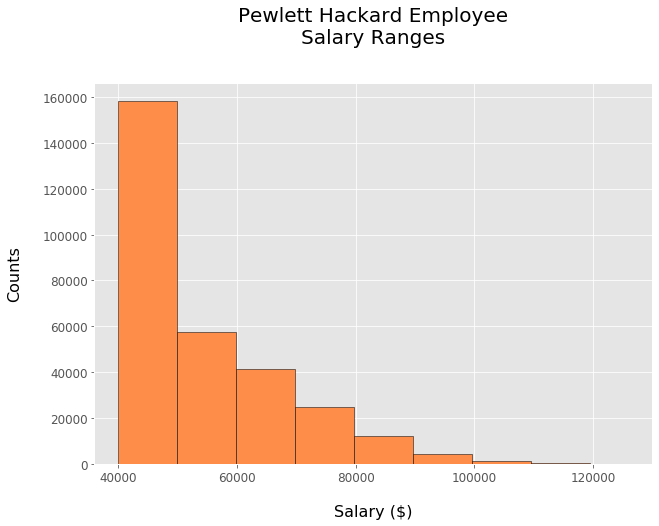

In [30]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(s_data['salary'],bins=9,color='xkcd:orangeish',alpha=1,edgecolor='black')
plt.title('Pewlett Hackard Employee\nSalary Ranges',fontsize=20,pad=40)
plt.xlabel('Salary ($)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Counts',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

s_mean=s_data['salary'].mean()
s_max=s_data['salary'].max()
s_min=s_data['salary'].min()

#print(f'- The mean salary is ${round(s_mean)}.')
#print(f'- The maximum salary is ${round(s_max)}.')
#print(f'- The minimum salary is ${round(s_min)}.')

##### Salary Statistics

+ The mean salary is **$52,971**.

+ The minimum salary is **$40,000**.

+ The maximum salary is **$129,492**.

---
### Create a Bar Chart of Average Salary by Title
---

#### Query of All Records in The Title Table

In [31]:
t_data=pd.read_sql('SELECT * FROM title', c)
t_data.head()

,emp_no,title,from_date,to_date,record_id
0,10001,Senior Engineer,1986-06-26,9999-01-01,1
1,10002,Staff,1996-08-03,9999-01-01,2
2,10003,Senior Engineer,1995-12-03,9999-01-01,3
3,10004,Engineer,1986-12-01,1995-12-01,4
4,10004,Senior Engineer,1995-12-01,9999-01-01,5


#### Check Title Data Set

In [45]:
# Identify incomplete rows:
t_data.count()

In [46]:
# Display an overview of the 'Title' column:
t_data['title'].value_counts()

#### Merge Title and Salary Dataframes Using an Inner Join

In [34]:
merged_df=pd.merge(t_data, s_data, on='emp_no')
merged_df

,emp_no,title,from_date_x,to_date_x,record_id_x,salary,from_date_y,to_date_y,record_id_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,60117,1986-06-26,1987-06-26,1
1,10002,Staff,1996-08-03,9999-01-01,2,65828,1996-08-03,1997-08-03,2
2,10003,Senior Engineer,1995-12-03,9999-01-01,3,40006,1995-12-03,1996-12-02,3
3,10004,Engineer,1986-12-01,1995-12-01,4,40054,1986-12-01,1987-12-01,4
4,10004,Senior Engineer,1995-12-01,9999-01-01,5,40054,1986-12-01,1987-12-01,4
...,...,...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,443304,49597,1987-08-30,1988-08-29,300022
443304,499997,Senior Engineer,1992-08-29,9999-01-01,443305,49597,1987-08-30,1988-08-29,300022
443305,499998,Senior Staff,1998-12-27,9999-01-01,443306,40000,1993-12-27,1994-12-27,300023
443306,499998,Staff,1993-12-27,1998-12-27,443307,40000,1993-12-27,1994-12-27,300023


#### Remove Titles That Have no Salary Records 

In [35]:
reduced_merged_df=merged_df[merged_df['from_date_x']==merged_df['from_date_y']]
reduced_merged_df.head()

,emp_no,title,from_date_x,to_date_x,record_id_x,salary,from_date_y,to_date_y,record_id_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,60117,1986-06-26,1987-06-26,1
1,10002,Staff,1996-08-03,9999-01-01,2,65828,1996-08-03,1997-08-03,2
2,10003,Senior Engineer,1995-12-03,9999-01-01,3,40006,1995-12-03,1996-12-02,3
3,10004,Engineer,1986-12-01,1995-12-01,4,40054,1986-12-01,1987-12-01,4
6,10005,Staff,1989-09-12,1996-09-12,7,78228,1989-09-12,1990-09-12,5


#### Extract Title and Salary Columns 

In [36]:
title_salary_df=reduced_merged_df[['title','salary']]
title_salary_df.dtypes
title_salary_df.head()

,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
6,Staff,78228


#### Group by Title

In [37]:
avg_grouped_reduced_merged_df=round(title_salary_df.groupby('title').agg(np.mean))
avg_grouped_reduced_merged_df

,salary
title,
Assistant Engineer,48493.0
Engineer,48548.0
Manager,57291.0
Senior Engineer,48425.0
Senior Staff,58548.0
Staff,58466.0
Technique Leader,48581.0


#### Reset Index  

In [38]:
final_df=avg_grouped_reduced_merged_df.reset_index()
final_df

,title,salary
0,Assistant Engineer,48493.0
1,Engineer,48548.0
2,Manager,57291.0
3,Senior Engineer,48425.0
4,Senior Staff,58548.0
5,Staff,58466.0
6,Technique Leader,48581.0


#### Average Employee Salary by Title

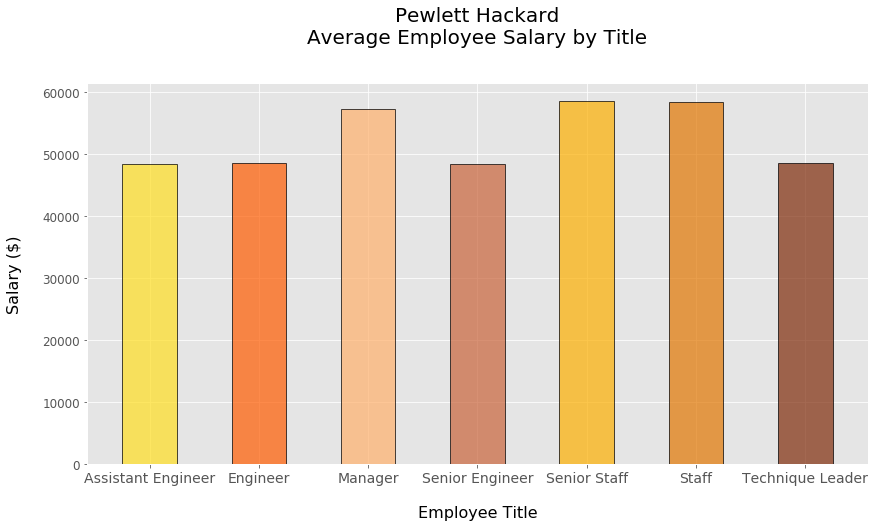

In [39]:
plt.rcParams['figure.figsize']=(14,7)
x_axis=final_df['title']
y_axis=final_df['salary']
ticks=np.arange(len(x_axis))
plt.bar(x_axis,y_axis,align='center',alpha=0.7,color=['xkcd:sun yellow','xkcd:bright orange','xkcd:apricot',
                                                    'xkcd:terra cotta','xkcd:yellow orange','xkcd:pumpkin',
                                                    'xkcd:reddish brown'],edgecolor='black',linewidth=1,width=0.5)
plt.title('Pewlett Hackard\nAverage Employee Salary by Title',fontsize=20,pad=40)
plt.xlabel('Employee Title',fontsize=16,color='black',labelpad=20)
plt.ylabel('Salary ($)',fontsize=16,color='black',labelpad=20)
plt.xticks(ticks,x_axis,rotation=0,fontsize=14)
plt.yticks(size=12)
plt.show()

---
### Epilogue
---

#### Extract Employee ID Number 499942

In [40]:
my_id=merged_df[merged_df['emp_no']==499942]
my_data=my_id[['emp_no','title','from_date_x','to_date_x','salary','from_date_y','to_date_y']]
my_data
my_data.columns=['emp_no','title','title_from_date','title_to_date','salary ($)','salary_from_date','salary_to_date']
my_data

,emp_no,title,title_from_date,title_to_date,salary ($),salary_from_date,salary_to_date
443224,499942,Technique Leader,1998-03-28,9999-01-01,40000,1998-03-28,1999-03-28
